In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Dense, Activation, GlobalAveragePooling2D, Input

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
import keras.backend as K

from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [4]:
ls

drive/  sample_data/


In [0]:
data_path = '/content/drive/My Drive/petrography/numpy_array_folder/'

In [0]:
x_images = np.load(data_path + "/x_images_px2.npz")
x = x_images['arr_0']

y_label = np.load(data_path + "/y_label_px2.npz")
y = y_label['arr_0']

In [7]:
x[450]

array([[[105.,  98.,  88., ..., 145., 190., 195.],
        [199., 240., 241., ..., 160., 155., 146.],
        [139., 133., 140., ..., 144., 130., 129.],
        ...,
        [ 66.,  69.,  77., ..., 165., 175., 167.],
        [116., 115., 120., ..., 151.,  92.,  90.],
        [ 91.,  61.,  56., ...,  85.,  82.,  86.]],

       [[ 82.,  83., 128., ..., 144., 144., 146.],
        [137., 138., 143., ..., 164., 123., 121.],
        [122.,   9.,   5., ...,  57.,  53.,  94.],
        ...,
        [201., 178., 182., ..., 229., 233., 204.],
        [205., 207., 144., ..., 144., 135., 126.],
        [ 77.,  72.,  69., ..., 157., 199., 201.]],

       [[200., 165., 169., ..., 154., 159., 199.],
        [200., 204., 221., ..., 106.,  95.,  89.],
        [102.,  98.,  89., ..., 130., 147., 146.],
        ...,
        [101.,  92.,  93., ...,  28.,   0.,   0.],
        [  9.,  47.,  46., ..., 169., 161.,  66.],
        [ 64.,  52.,  33., ...,  92.,  86.,  96.]]], dtype=float32)

In [8]:
y

array(['p', 'p', 'p', ..., 'x', 'x', 'x'], dtype='<U1')

In [9]:
# Split into training, validation, and test sets (80/10/10)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)

print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))
# print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))

Train set size: 3840, Val set size: 480, Test set size: 480


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255.0
X_test /= 255.0
X_val /= 255.0

In [0]:
X_train_reshape = X_train.reshape(-1,224,224,3)
X_val_reshape = X_val.reshape(-1,224,224,3)
X_test_reshape = X_test.reshape(-1,224,224,3)

In [12]:
# integer encode
label_encoder = LabelEncoder()
y_train_integer_encoded = label_encoder.fit_transform(y_train)
y_val_integer_encoded = label_encoder.fit_transform(y_val)
y_test_integer_encoded = label_encoder.fit_transform(y_test)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)

y_train_integer_encoded = y_train_integer_encoded.reshape(len(y_train_integer_encoded), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train_integer_encoded)

y_val_integer_encoded = y_val_integer_encoded.reshape(len(y_val_integer_encoded), 1)
y_val_onehot = onehot_encoder.fit_transform(y_val_integer_encoded)

y_test_integer_encoded = y_test_integer_encoded.reshape(len(y_test_integer_encoded), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test_integer_encoded)

print("y: Train set shape: {0}, Val set shape: {1}, Test set shape: {2}".format(y_train_onehot.shape, y_val_onehot.shape, y_val_onehot.shape))

y: Train set shape: (3840, 2), Val set shape: (480, 2), Test set shape: (480, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [13]:
y_train_integer_encoded.shape

(3840, 1)

In [14]:
y_val_integer_encoded.shape

(480, 1)

In [15]:
y_test_integer_encoded.shape

(480, 1)

In [16]:
X_train.shape

(3840, 3, 224, 224)

In [17]:
X_val.shape

(480, 3, 224, 224)

In [18]:
X_test.shape

(480, 3, 224, 224)

In [19]:
X_train_reshape.shape

(3840, 224, 224, 3)

In [20]:
X_val_reshape.shape

(480, 224, 224, 3)

In [21]:
X_test_reshape.shape

(480, 224, 224, 3)

In [22]:
X_train[450]

array([[[0.06666667, 0.01176471, 0.00784314, ..., 0.9254902 ,
         0.85882354, 0.90588236],
        [0.90588236, 0.6784314 , 0.7137255 , ..., 0.23137255,
         0.25490198, 0.38431373],
        [0.41960785, 0.45490196, 0.14117648, ..., 0.0627451 ,
         0.05882353, 0.04313726],
        ...,
        [0.8       , 0.80784315, 0.5254902 , ..., 0.21568628,
         0.22745098, 0.24705882],
        [0.24313726, 0.30980393, 0.34901962, ..., 0.03921569,
         0.03529412, 0.02745098],
        [0.03921569, 0.03137255, 0.02352941, ..., 0.5568628 ,
         0.5568628 , 0.7647059 ]],

       [[0.8039216 , 0.8117647 , 0.5137255 , ..., 0.36078432,
         0.40392157, 0.4117647 ],
        [0.38431373, 0.4509804 , 0.5137255 , ..., 0.02745098,
         0.03137255, 0.02352941],
        [0.03529412, 0.02352941, 0.01568628, ..., 0.12156863,
         0.11764706, 0.43137255],
        ...,
        [0.18431373, 0.84313726, 0.827451  , ..., 0.6745098 ,
         0.654902  , 0.7647059 ],
        [0.7

In [23]:
X_train_reshape[450]

array([[[0.06666667, 0.01176471, 0.00784314],
        [0.12941177, 0.09019608, 0.12156863],
        [0.02352941, 0.01960784, 0.07450981],
        ...,
        [0.09803922, 0.08235294, 0.07843138],
        [0.0627451 , 0.04705882, 0.03529412],
        [0.0627451 , 0.05882353, 0.04313726]],

       [[0.34117648, 0.28627452, 0.2509804 ],
        [0.25882354, 0.21568628, 0.20784314],
        [0.05490196, 0.02745098, 0.05490196],
        ...,
        [0.05490196, 0.04705882, 0.05882353],
        [0.0627451 , 0.05490196, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.47058824, 0.40784314, 0.34901962],
        [0.29803923, 0.24313726, 0.20784314],
        [0.12941177, 0.07450981, 0.07058824],
        ...,
        [0.05490196, 0.04705882, 0.05882353],
        [0.05098039, 0.05098039, 0.05882353],
        [0.04705882, 0.03921569, 0.04313726]],

       ...,

       [[0.14509805, 0.16862746, 0.15294118],
        [0.14509805, 0.18431373, 0.19215687],
        [0.2627451 , 0

In [24]:
y_train_integer_encoded[450]

array([1])

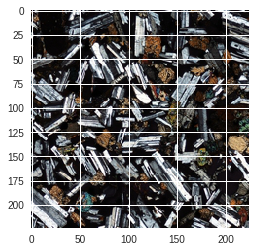

In [25]:
plt.imshow(X_train_reshape[450])
plt.show()

In [26]:
K.set_image_data_format('channels_last')
K.image_data_format()

'channels_last'

**InceptionV3**

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

In [28]:
img_height,img_width = 224, 224 
num_classes = 1

base_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(num_classes, activation= 'sigmoid', name='fc_px')(x)
model = Model(inputs = base_model.input, outputs = predictions)

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 1s 0us/step


In [29]:
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer = adam,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
checkpointer = ModelCheckpoint(filepath = '/content/drive/My Drive/petrography/model/model_inceptionv3_px2.h5',
                               verbose=1, save_best_only=False)

tensorboard = TensorBoard(log_dir='/content/drive/My Drive/petrography/tensorboard/tb_inceptionv3_px2')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [31]:
from tensorboardcolab import *
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://c14ac335.ngrok.io


In [32]:
history = model.fit(x = X_train_reshape, y = y_train_integer_encoded, batch_size=32,
                    epochs=50, 
                    validation_data=(X_val_reshape, y_val_integer_encoded), shuffle=True,
                    callbacks=[checkpointer, 
                               tensorboard,
                               reduce_lr,
                               TensorBoardColabCallback(tbc)])

Instructions for updating:
Use tf.cast instead.
Train on 3840 samples, validate on 480 samples
Epoch 1/50
3840/3840 [==============================] - 101s 26ms/step - loss: 0.1552 - acc: 0.9344 - val_loss: 0.0148 - val_acc: 0.9917

Epoch 00001: saving model to /content/drive/My Drive/petrography/model/model_inceptionv3_px2.h5
Epoch 2/50
3840/3840 [==============================] - 86s 22ms/step - loss: 0.0240 - acc: 0.9919 - val_loss: 0.0233 - val_acc: 0.9896

Epoch 00002: saving model to /content/drive/My Drive/petrography/model/model_inceptionv3_px2.h5
Epoch 3/50
3840/3840 [==============================] - 86s 22ms/step - loss: 0.0113 - acc: 0.9964 - val_loss: 0.0117 - val_acc: 0.9938

Epoch 00003: saving model to /content/drive/My Drive/petrography/model/model_inceptionv3_px2.h5
Epoch 4/50
3840/3840 [==============================] - 86s 22ms/step - loss: 0.0263 - acc: 0.9919 - val_loss: 0.0187 - val_acc: 0.9958

Epoch 00004: saving model to /content/drive/My Drive/petrography/mod

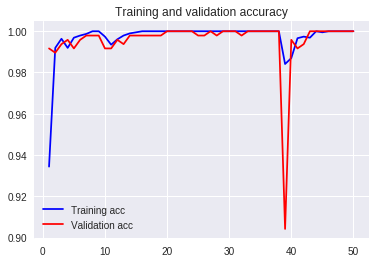

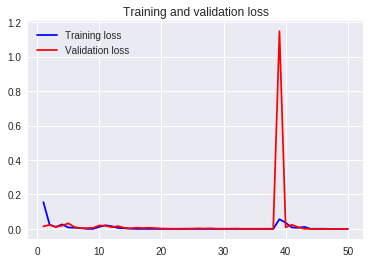

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
result = model.evaluate(X_test_reshape, y_test_integer_encoded)
print ("Loss = " + str(result[0]))
print ("Test Accuracy = " + str(result[1]))

480/480 [==============================] - 3s 6ms/step
Loss = 0.0018781289616223754
Test Accuracy = 1.0


In [35]:
pred = model.predict(X_test_reshape, verbose=1)

480/480 [==============================] - 4s 9ms/step


In [36]:
result

[0.0018781289616223754, 1.0]

In [37]:
pred

array([[2.26497650e-06],
       [9.99999642e-01],
       [2.98023224e-08],
       [9.99998987e-01],
       [1.02370977e-04],
       [2.21431255e-04],
       [8.49366188e-06],
       [5.96046448e-08],
       [1.00000000e+00],
       [0.00000000e+00],
       [9.99999464e-01],
       [2.05636024e-05],
       [4.17232513e-07],
       [2.59876251e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [8.55326653e-06],
       [2.68220901e-07],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99794841e-01],
       [1.00000000e+00],
       [2.11596489e-06],
       [2.68220901e-07],
       [9.99992192e-01],
       [1.00000000e+00],
       [9.99980807e-01],
       [5.96046448e-08],
       [0.00000000e+00],
       [2.68220901e-07],
       [9.99991536e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.36441803e-07],
       [1.45733356e-05],
       [0.00000000e+00],
       [1.00000000e+00],
       [9.99999940e-01],
       [8.51154327e-05],
       [1.00000000e+00],


In [0]:
y_train_pred = model.predict(X_train_reshape).ravel()
y_test_pred = model.predict(X_test_reshape).ravel()

In [0]:
y_train_pred_class = model.predict(X_train_reshape)
y_test_pred_class = model.predict(X_test_reshape)

In [40]:
y_train_pred

array([1.0000000e+00, 2.8043985e-05, 1.3411045e-06, ..., 1.0000000e+00,
       1.4901161e-07, 1.0000000e+00], dtype=float32)

In [41]:
y_train_pred_class

array([[1.0000000e+00],
       [2.8043985e-05],
       [1.3411045e-06],
       ...,
       [1.0000000e+00],
       [1.4901161e-07],
       [1.0000000e+00]], dtype=float32)

In [42]:
y_test_pred

array([2.26497650e-06, 9.99999642e-01, 2.98023224e-08, 9.99998987e-01,
       1.02370977e-04, 2.21431255e-04, 8.49366188e-06, 5.96046448e-08,
       1.00000000e+00, 0.00000000e+00, 9.99999464e-01, 2.05636024e-05,
       4.17232513e-07, 2.59876251e-05, 1.00000000e+00, 1.00000000e+00,
       8.55326653e-06, 2.68220901e-07, 1.00000000e+00, 1.00000000e+00,
       9.99794841e-01, 1.00000000e+00, 2.11596489e-06, 2.68220901e-07,
       9.99992192e-01, 1.00000000e+00, 9.99980807e-01, 5.96046448e-08,
       0.00000000e+00, 2.68220901e-07, 9.99991536e-01, 1.00000000e+00,
       1.00000000e+00, 5.36441803e-07, 1.45733356e-05, 0.00000000e+00,
       1.00000000e+00, 9.99999940e-01, 8.51154327e-05, 1.00000000e+00,
       1.00000000e+00, 9.99999404e-01, 4.78923321e-05, 1.00000000e+00,
       3.33786011e-06, 5.66244125e-07, 9.83476639e-07, 1.00000000e+00,
       0.00000000e+00, 8.94069672e-06, 9.99999404e-01, 9.32812691e-06,
       1.00000000e+00, 9.99675035e-01, 4.47034836e-07, 1.92523003e-05,
      

In [43]:
y_train_pred_class

array([[1.0000000e+00],
       [2.8043985e-05],
       [1.3411045e-06],
       ...,
       [1.0000000e+00],
       [1.4901161e-07],
       [1.0000000e+00]], dtype=float32)